In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_url = 'https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Loan_Prediction/test.csv'
train_url = 'https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Loan_Prediction/train.csv'

In [72]:
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [73]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


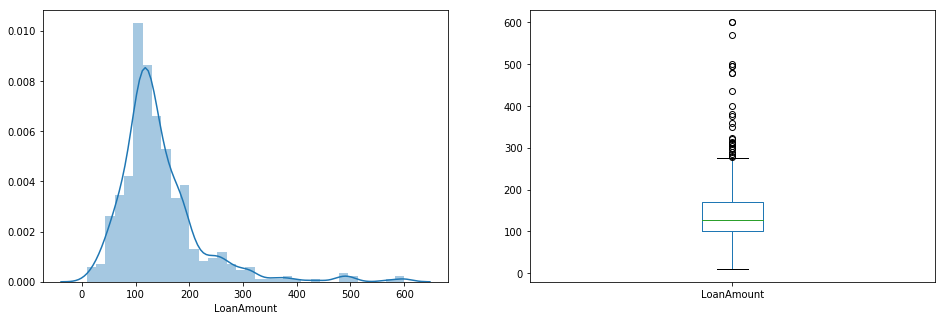

In [176]:
plt.figure(6)

plt.subplot(121)
train_notnull = train.dropna()
sns.distplot(train_notnull['LoanAmount'])

plt.subplot(122)
train_notnull['LoanAmount'].plot.box(figsize = (16,5))

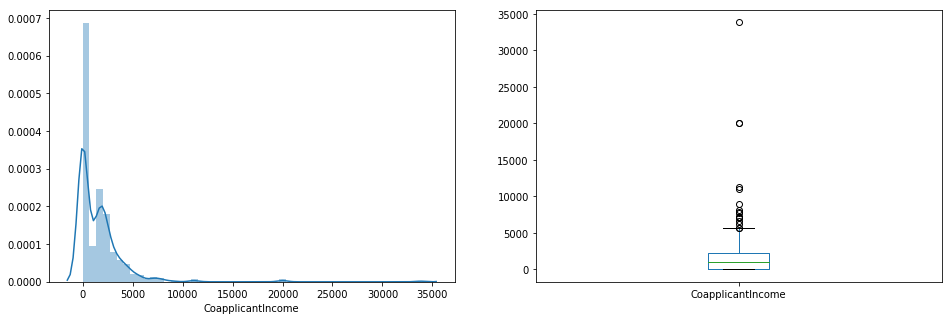

In [177]:
plt.figure(5)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))

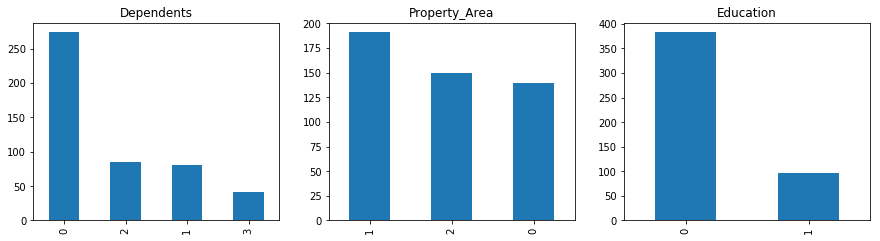

In [178]:
plt.figure(2)

plt.subplot(231)
train['Dependents'].value_counts().plot.bar(figsize = (15,8), title = 'Dependents')

plt.subplot(232)
train['Property_Area'].value_counts().plot.bar(figsize = (15,8), title = 'Property_Area')

plt.subplot(233)
train['Education'].value_counts().plot.bar(figsize = (15,8), title = 'Education')

In [74]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [75]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [76]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [77]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [78]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
train = train[~train['Gender'].isna()]

In [80]:
train = train[~train['Dependents'].isna()]
train = train[~train['Self_Employed'].isna()]
train = train[~train['LoanAmount'].isna()]
train = train[~train['Credit_History'].isna()]
train = train[~train['Loan_Amount_Term'].isna()]


In [81]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Gender'])
x=le.transform(train['Gender']) 
train['Gender'] = x

In [101]:
le.fit(train['Married'])
x=le.transform(train['Married']) 
train['Married'] = x

In [102]:
le.fit(train['Dependents'])
x=le.transform(train['Dependents']) 
train['Dependents'] = x

In [84]:
le.fit(train['Education'])
x=le.transform(train['Education']) 
train['Education'] = x

In [85]:
le.fit(train['Self_Employed'])
x=le.transform(train['Self_Employed']) 
train['Self_Employed'] = x

In [99]:
le.fit(train['Property_Area'])
x=le.transform(train['Property_Area']) 
train['Property_Area'] = x

In [98]:
le.fit(train['Loan_Status'])
x=le.transform(train['Loan_Status']) 
train['Loan_Status'] = x

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null int32
Married              480 non-null int64
Dependents           480 non-null int32
Education            480 non-null int32
Self_Employed        480 non-null int32
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null int64
LoanAmount           480 non-null int64
Loan_Amount_Term     480 non-null int64
Credit_History       480 non-null int64
Property_Area        480 non-null int32
Loan_Status          480 non-null int64
dtypes: int32(5), int64(7), object(1)
memory usage: 43.1+ KB


In [104]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1
5,LP001011,1,1,2,0,1,5417,4196,267,360,1,2,1


In [105]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
train[cols] = train[cols].applymap(np.int64)

In [106]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156170,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000319,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074498,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001508,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156170,0.102950,-0.000319,-0.074498,-0.001508,-0.112588,1.000000,0.190740,-0.005773,-0.008692,0.006539,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005773,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


In [107]:
x = train[[ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [108]:
y = train[['Loan_Status']]

In [109]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

In [110]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [111]:
model.fit(xtrain,ytrain)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
model.score(xtest,ytest)

0.7777777777777778

In [113]:
model.score(xtrain,ytrain)

0.8214285714285714

In [170]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(n_estimators = 60, max_depth =1,random_state = 0,max_features=7)

In [171]:
model_random.fit(xtrain,ytrain)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [172]:
model_random.score(xtrain,ytrain)

0.8184523809523809

In [175]:
model_random.score(xtest,ytest)

0.7847222222222222